# Sign Language Image Classification

In the below implemented convolution neural network, model classifies sign language digits for 10 classes from 0 to 9. I used MobileNet model, you can make the changes in the classes and model if required.

## Import the required libraries

In [99]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.metrics import confusion_matrix
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
# path for train, test and valid data of sign languages
train_path = "/content/gdrive/My Drive/datasets/train"
valid_path = "/content/gdrive/My Drive/datasets/valid"
test_path = "/content/gdrive/My Drive/datasets/test"

In [101]:
# creating the batches for each path

train_batches = ImageDataGenerator(rescale = 1.0/255.0, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True).flow_from_directory(train_path, target_size = (224, 224), batch_size = 10, class_mode = 'categorical')
valid_batches = ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory(valid_path, target_size = (224,224), batch_size = 10, class_mode = 'categorical')
test_batches = ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory(test_path, target_size = (224, 224), batch_size = 10, shuffle = False, class_mode = 'categorical')

Found 1652 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


## Using the Mobile Net model

In [102]:
mobile = MobileNet()

In [103]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [104]:
x = mobile.layers[-6].output
predictions = Dense(10, activation = "softmax")(x)
model = Model(inputs = mobile.input, outputs = predictions)

In [105]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [106]:
for layer in model.layers[:-24]:
    layer.trainable = False

## Training the model

In [107]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [108]:
model.fit_generator(train_batches, 
                    steps_per_epoch = math.ceil(train_batches.n / train_batches.batch_size),
                    validation_data = valid_batches,
                    validation_steps = math.ceil(valid_batches.n / valid_batches.batch_size),
                    epochs = 50, verbose = 2 )

Epoch 1/50
166/166 - 23s - loss: 0.4490 - accuracy: 0.8590 - val_loss: 1.2257 - val_accuracy: 0.6967
Epoch 2/50
166/166 - 23s - loss: 0.1828 - accuracy: 0.9413 - val_loss: 0.7342 - val_accuracy: 0.8467
Epoch 3/50
166/166 - 23s - loss: 0.1045 - accuracy: 0.9685 - val_loss: 0.7378 - val_accuracy: 0.8333
Epoch 4/50
166/166 - 23s - loss: 0.0912 - accuracy: 0.9746 - val_loss: 0.2976 - val_accuracy: 0.9200
Epoch 5/50
166/166 - 23s - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.1451 - val_accuracy: 0.9800
Epoch 6/50
166/166 - 23s - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.2070 - val_accuracy: 0.9500
Epoch 7/50
166/166 - 23s - loss: 0.0809 - accuracy: 0.9782 - val_loss: 0.2029 - val_accuracy: 0.9600
Epoch 8/50
166/166 - 23s - loss: 0.0937 - accuracy: 0.9703 - val_loss: 0.2551 - val_accuracy: 0.9867
Epoch 9/50
166/166 - 23s - loss: 0.0252 - accuracy: 0.9933 - val_loss: 0.1875 - val_accuracy: 0.9900
Epoch 10/50
166/166 - 23s - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.1722 - val_accura

## Predictions using test data

In [109]:
test_labels = test_batches.classes

In [110]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [111]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [112]:
predictions = model.predict_generator(test_batches, steps = 11, verbose = 0)

## Plotting the test data by using confusion matrix

In [113]:
# for confusion_matrix

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'confusion_matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print("confusion matrix not normalized")
    
    
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
    

In [114]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

confusion matrix not normalized
[[11  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


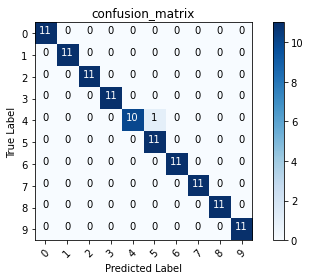

In [115]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title = 'confusion_matrix')